# <u>**Projet - Leyenda**<u>

<br>

|Auteur|
|---|
|Ben Brahim Celine|
|Aidi Ikbal|
|Belkacem Charaf|
|Belghait Adel|
|Charni Rostom|


# Sujet
### Contexte
L'entreprise TouNum travaille sur la numérisation de documents (textes, images...). Leurs services sont souvent requis par des entreprises numérisant leur base de documents papier. Ils souhaitent étendre leur gamme de services pour inclure des outils de Machine Learning. En effet, certains de leurs clients ont une grande quantité de données à numériser, et un service de catégorisation automatique serait plus que valorisable.
TouNum n'a pas dans son personnel de spécialiste du Machine Learning. L'entreprise fait appel à nous, les spécialistes en Data Science de CESI. On nous propose un premier contrat pour travailler sur une solution visant à analyser des photographies pour en déterminer une légende descriptive de manière automatique (du captioning).

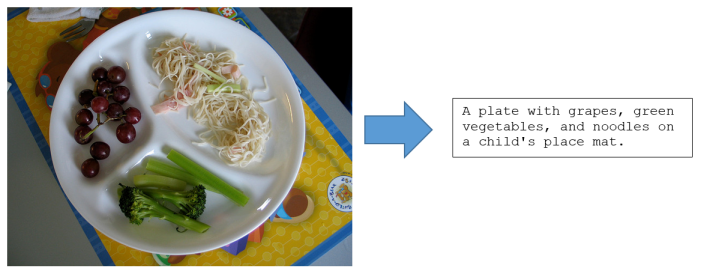

Cela parait ambitieux, mais les techniques existent, et elles fonctionnent plutôt bien. Ceci dit, il y a deux challenges à relever, en plus de cet étiquetage proprement dit. Tout d'abord, la numérisation se faisant à la chaîne et sur des images de qualité variable (parfois floues, ou bruitées), il faudra tout d'abord voir ce qu'on peut faire pour nettoyer ces images. Et puis, Tounum a déjà numérisé beaucoup de documents sur lesquels ils souhaitent faire tourner les algorithmes d'apprentissage que nous allons concevoir. Or, Certaines de ces images ne sont pas des photos, mais parfois des images de documents composés, ou des schémas, voire des dessins ou des peintures. Il faudrait donc qu'on puisse, en amont de l'analyse de contenu, faire le tri entre les photos et le reste.

Heureusement, Tounum a déjà quelques milliers d'images catégorisées et étiquetées. Voilà qui devrait être utile pour effectuer de l'apprentissage supervisé.

### Objectifs et Contraintes
Le workflow à concevoir aura la forme suivante:
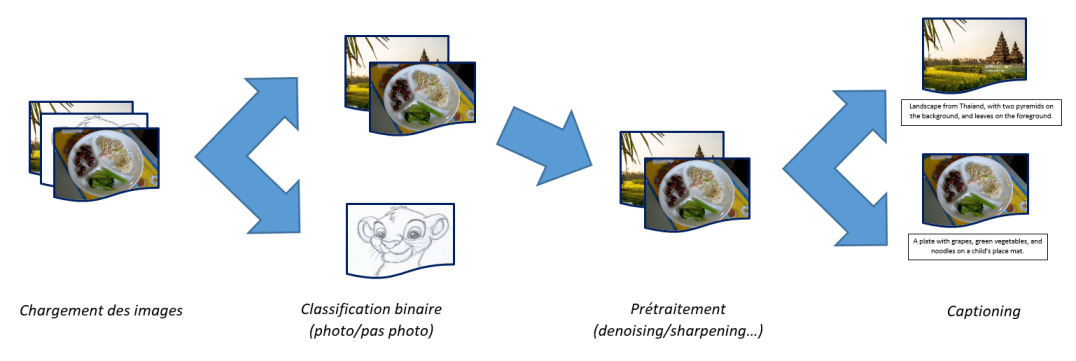
L'implémentation des algorithmes s'appuiera sur Python et les librairies SciKit et TensorFlow. Par ailleurs, la librairie Pandas sera utilisée dès qu'il s'agira de manipuler des dataset. ImageIO sera utile pour charger des images. Enfin, nous réutiliserons des bibliothèques de calcul avec lesquelles nous avons déjà fait connaissance, comme NumPy et MatPlotLib

La classification binaire s'appuiera sur des réseaux de neurones. Elle permettra de trier les images en deux catégorie : photo, et autre type d'image. A minima, notre algorithme sera capable de différencier entre une photo et un schéma ou un texte scanné. Idéalement, l'algorithme arrivera à discriminer entre des photos et des peintures (ce qui sera plus difficile, une peinture risquant d'être plus proche visuellement d'une photo). Tounum a déjà classé un certain nombre d'images, nous aurons donc un dataset d'images catégorisées pour entraîner notre réseau de neurones.

Le prétraitement s'appuiera sur des notions assez simples autour des filtres de convolution, et les appliquera pour améliorer la qualité de l'image.

Le Captioning, c'est-à-dire la génération automatique des légendes, utilisera deux techniques avancées de Machine Learning : les réseaux de neurones récurrents (RNN), et les réseaux de neurones convolutifs (CNN). Si les RNN permettent de générer les étiquettes, il sera nécessaire de passer avant par des CNN pour prétraiter les images. Cela va nous permettre d'identifier les zones d'intérêt dans les images, et de représenter les images en question de manière plus compacte (parce que si nous devons charger des milliers d'images dans la RAM, ça va vite devenir coûteux en performances). Nous nous appuierons sur des dataset d'étiquetage classiques pour effectuer l'apprentissage supervisé.

TouNum souhaite être en mesure de produire un logiciel dans quelques mois. Elle attend donc un prototype de notre part d'ici 5 semaines.

La solution que nous proposerons doit être entièrement automatisée (de la donnée à l'étiquetage) pour pouvoir s'adapter rapidement et simplement à tout type de données d'images. TouNum attend une réponse et une solution qui puisse se lire sous la forme d'un notebook Jupyter. À la lecture de nos documents, TouNum doit être en mesure de mettre notre solution en production ainsi que d'en assurer la maintenance. Notre notebook devra aussi présenter le contexte métier dans lequel elle s'inscrit, et démontrer la pertinence de notre modèle de manière rigoureuse et pédagogique.

TouNum nous demandera, après étude de notre livrable (notebook et workflow) de présenter notre solution devant le responsable R&D et le directeur de TouNum. Nous aurons 20 minutes pour expliquer et justifier notre workflow, faire une démonstration de la solution, et apporter des éléments de réflexion quant aux objectifs finaux de TouNum. Nous devrons faire preuve de recul et d'esprit critique quant au travail présenté.
__________________________________________________

## Livrable 1 : Réseaux de neurones et classification binaire

## Enjeux

Le but de notre modèle sera de décrire une photographie, en analysant son contenu. Cependant, cela implique une première chose: il faut s'assurer que l'image entrée soit bien une photographie.

En effet, TouNum travaillant sur de nombreux types de documents, on peut trouver dans un dossier pêle-mêle des photos, des dessins, des documents textuels, des schémas ou encore des peintures... Et le but de notre algorithme, c'est de pouvoir décrire en peu de temps plusieurs milliers de photos. Il serait donc une perte de temps de déléguer à l'utilisateur de notre algorithme le filtrage de ses données entrantes.

Nous devons donc, avec un modèle de deep learning, filtrer les images passées en entrée pour ne garder que celles correspondant bien à une photographie.

## Principe théorique

### Le problème des images

Comme nous l'avons vu plus tôt, il est possible dans un réseau de neurones profond d'appliquer un ensemble de couches fully connected entre les entrées et les sorties de notre modèle. Cependant, dans le cas d'une image, cela pose de nombreux problèmes.

Il faut imaginer une image comme un ensemble de pixels ; chaque pixel est représenté par une valeur numérique (3 valeurs dans le cas d'images en couleurs ; mais nous resterons sur l'exemple des images monochromes pour expliquer le principe). Chaque pixel de notre image correspondra donc à un neurone d'entrée dans notre modèle.

Cependant, bien que chaque pixel de notre image soit une entrée, chacun d'entre eux pris séparément ne nous donne aucune information sur l'image. En effet, lorsque l'on analyse une image par deep learning, que ce soit pour la classifier, la commenter, ou encore la transformer, on recherche les parties de l'image qui la rende unique : le bec d'un oiseau, la structure du visage d'une personne, la couleur d'un renard... On appelle ces parties pertinentes de l'image des `features` (fonctionnalités).

Ces fonctionnalités ne sont donc pas des pixels isolés ; mais bien un ensemble de pixels, dont la position les uns par rapport aux autres est très importante. Or, dans le cas des couches fully connected, on perd complètement cette spatialité des pixels dans l'image : chaque neurone (et de fait pixel) est connecté à tous les neurones de la couche suivante !

### Qu'est-ce que le pooling ?

Le problème de n'appliquer que des convolutions, c'est que l'on est très sensible au zoom dans l'image que l'on analyse. En effet, si l'on recherche le visage de quelqu'un, mais que celui-ci est en arrière-plan, il sera difficile de l'analyser avec la même couche convolutive qu'une autre image dans laquelle il est au premier plan.

C'est pour cela que l'on a recours au `pooling` : cela consiste simplement à réduire les dimensions de l'image, ce qui permet ensuite d'appliquer une autre convolution sur une image plus petite.

Dans l'exemple ci-dessous, c'est un pooling par valeur maximum qui est appliqué : on divise l'image par zones de 4x4 pixels, et on ne retient pour chacune d'entre elles que le pixel dont la valeur est la plus élevée.

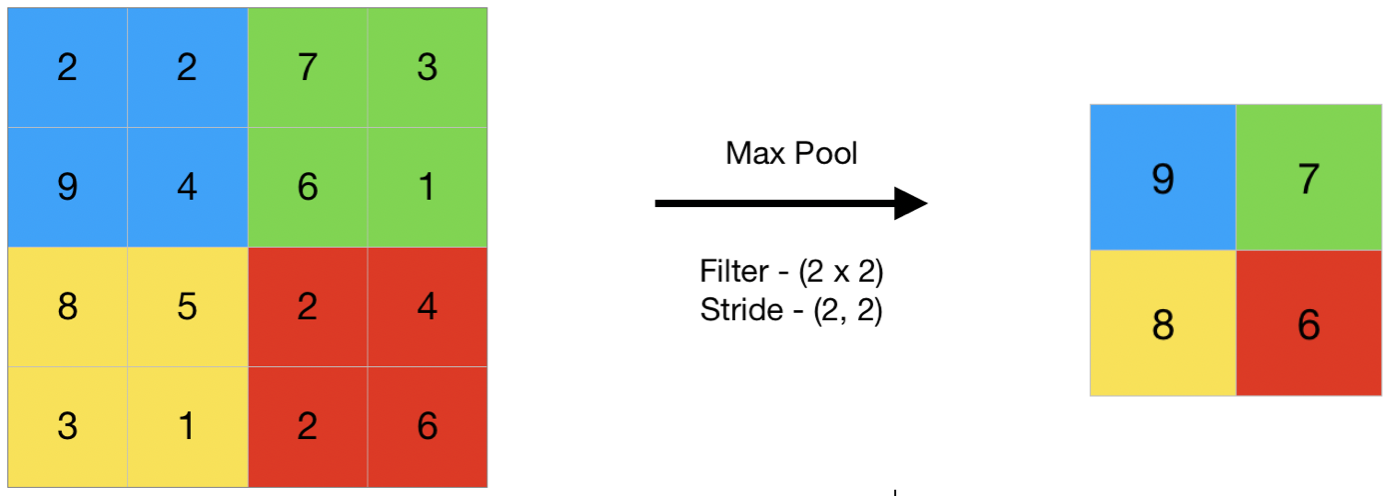

### Réseaux de neurones convolutifs (CNN)

Les réseaux de neurones convolutifs sont ainsi constitués de plusieurs couches de convolution, entre lesquelles on applique des couches de pooling. Ces couches de convolution permettent de ne retenir de l'image que les fonctionnalités pertinentes.

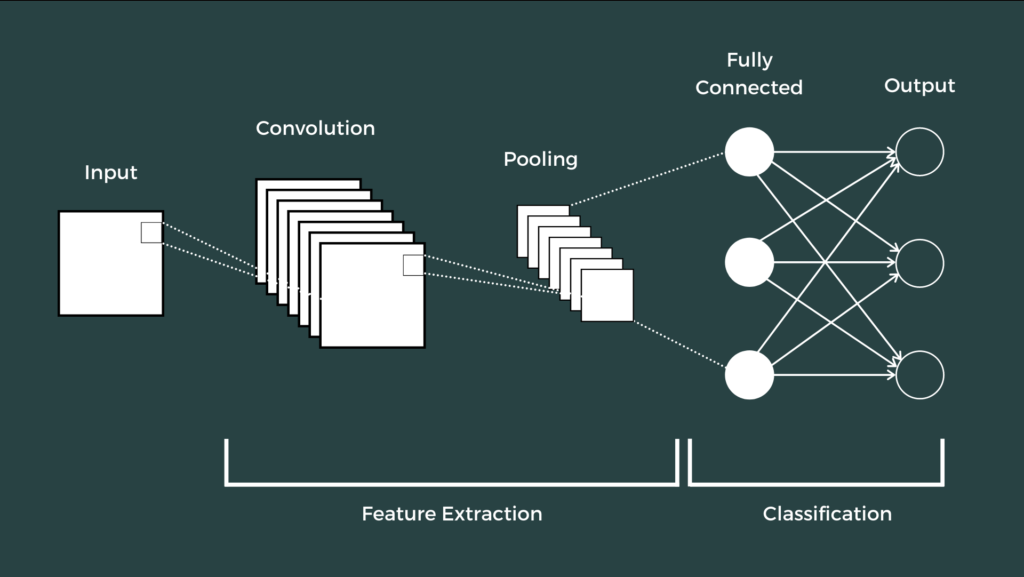

### Et dans le cas de la classification ?

Le CNN dont nous avons parlé plus tôt nous permet de transformer nos inputs, un ensemble de neurones, en un ensemble de fonctionnalités importantes dans l'image. Par la suite, il nous faut traiter ces nouvelles informations pour en déduire la classe à laquelle appartient notre image.

Pour cela, rien de mieux qu'un ensemble de couches fully connected, entrainées pour classifier nos images en fonctions des features présentes à l'intérieur !

## Réflexions préliminaires

Le dataset d'entraînement qui nous est fourni labélise les images selon 5 catégories:
- Painting
- Photo
- Schematics
- Sketch
- Text

Cependant, notre optique reste de filtrer nos images en entrée; le besoin est donc de filtrer les images qui ne sont pas des photographies, pour ne garder que les photos.


### Préparation de l'environnement

In [10]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

### Définir les chemins des différents datasets
Tout d'abord, nous avons organisé le processus en regroupant les images dans un répertoire unique. 
Ensuite, nous avons effectué une étape cruciale de classification en attribuant des labels spécifiques 
à chaque type d'image. Plus précisément, les images ont été catégorisées de la manière suivante : les 
photos ont reçu l'étiquette 0, les peintures ont été étiquetées en tant que 2, les schémas ont été 
assignés à la catégorie 3, le texte a été distingué avec l'étiquette 4, et enfin, les croquis ont été 
désignés par l'étiquette 1. 
Cette méthodologie de classification nous a permis de systématiser et de rendre plus efficace la gestion 
de notre ensemble de données, garantissant ainsi une approche professionnelle et organisée pour notre projet.

In [14]:
path="D:\\Projet Deep Learning\\"
filenames = os.listdir(path)
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'Photo':
        categories.append(0)
    elif category == 'Painting':
        categories.append(2)
    elif category == 'Schematics':
        categories.append(3)
    elif category == 'Text':
        categories.append(4)    
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

### Exploration des données
c'est une étape cruciale dans le processus de construction de modèles d'apprentissage automatique, en particulier lorsque on travaille avec des données d'image.
La méthode df[df.category==0].count() est utilisée pour filtrer un DataFrame en extrayant 
uniquement les lignes où la valeur de la colonne "category" est égale à zéro c'est seulement les 
photos,puis elle compte le nombre d'occurrences dans ce sous-ensemble, ce qui est particulièrement 
utile pour obtenir des statistiques et préparer les données pour des analyses ultérieures.

In [16]:
df[df.category==0].count()

filename    1
category    1
dtype: int64

<Axes: xlabel='category'>

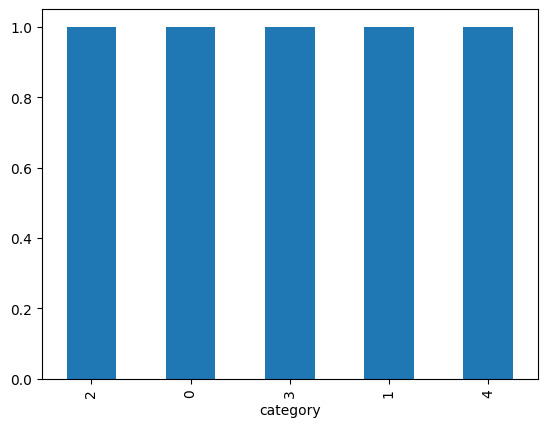

In [17]:
df['category'].value_counts().plot.bar()

Ce graphe à barres présente le nombre d'éléments dans chaque catégorie sous forme de barres, 
avec le nom de la catégorie sur l'axe horizontal  et le nombre d'éléments sur l'axe vertical . 
Cette représentation visuelle montre clairement la différence de taille entre les catégories, 
avec "Photos" ayant 9 992 éléments, "Painting," "Schematics," et "Text" ayant 10 000 éléments chacun, 
et "Sketch" ayant 1 406 éléments.

Cette méthode inclut la génération aléatoire d'un échantillon d'images à partir d'un répertoire, 
le chargement de l'image sélectionnée, puis son affichage à l'aide de la bibliothèque matplotlib

In [18]:
sample = random.choice(filenames)
image = load_img(path+sample)
plt.imshow(image)

PermissionError: [Errno 13] Permission denied: 'D:\\Projet Deep Learning\\Sketch'

Cette partie de code est dédiée à la manipulation des données, en particulier à l'échantillonnage aléatoire et à la réduction de la taille de certaines catégories dans notre jeu de données. 

Cette méthode est conçue pour mélanger (ou "shuffle") un DataFrame qui contient les images. 
Le paramètre random_state=42 est utilisé pour garantir que le mélange soit reproductible, 
c'est-à-dire que si vous exécutez cette fonction plusieurs fois avec la même valeur de random_state, 
vous obtiendrez le même ordre de mélange à chaque fois.

En préparant des données pour l'apprentissage automatique, le mélange des données est essentiel 
pour éviter tout biais lié à l'ordre des échantillons.

In [7]:
def shuffle_image (df): 
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)
        return df 


Le code que vous avez présenté divise un DataFrame en plusieurs sous-ensembles en fonction 
de la valeur de la colonne "category". Chaque sous-ensemble est créé pour contenir uniquement 
les lignes correspondant à une catégorie spécifique.

In [8]:
photo=df[df.category==0]
sketch=df[df.category==1]
painting=df[df.category==2]
schematics=df[df.category==3]
text=df[df.category==4]

On a fait un appel à la fonction shuffle pour mélanger les images de chaque catégories 

In [9]:
photo =shuffle_image(photo) #9992
sketch =shuffle_image(sketch) #1406  # 1092
painting=shuffle_image(painting)#10000  
schematics=shuffle_image(schematics)#10000
text=shuffle_image(text)#10000
# 2498

A partir de chaque catégorie on  prend 2498 images

In [10]:
painting=painting[0:2498]
schematics=schematics[0:2498]
text=text[0:2498]

In [11]:
painting.shape

(2498, 2)

In [13]:
sketch.head()

,filename,category
0,981.png,1
1,62.png,1
2,2608.png,1
3,177.png,1
4,Mp-010-1-sz1.jpg,1


In [14]:
painting

,filename,category
0,painting_06253.jpg,2
1,painting_04685.jpg,2
2,painting_01732.jpg,2
3,painting_04743.jpg,2
4,painting_04522.jpg,2
...,...,...
2493,painting_07273.jpg,2
2494,painting_04760.jpg,2
2495,painting_04863.jpg,2
2496,painting_07026.jpg,2


In [15]:
sketch.head()

,filename,category
0,981.png,1
1,62.png,1
2,2608.png,1
3,177.png,1
4,Mp-010-1-sz1.jpg,1


Cette partie est dédié à la génération d'images augmentées à partir d'un ensemble d'images existantes. L'augmentation d'images est une technique courante en vision par ordinateur qui vise à augmenter la variabilité des données d'entraînement en appliquant diverses transformations aux images existantes. Cela peut améliorer les performances d'un modèle d'apprentissage automatique en lui permettant de mieux généraliser sur de nouvelles données. 

Pour la catégorie "Sketch", nous constatons actuellement un nombre limité de seulement 
1409 images, ce qui est insuffisant. Afin d'équilibrer la distribution des catégories, 
nous devons augmenter le nombre d'éléments de la catégorie "Sketch" à 2498.

In [ ]:
import Augmentor
def apply_augmentations(input_dir, output_dir, num_samples, rotation_range=25, flip_probability=0.5,
                        zoom_probability=0.5, zoom_percentage=0.8, contrast_probability=0.5,
                        contrast_min_factor=0.8, contrast_max_factor=1.2, brightness_probability=0.5,
                        brightness_min_factor=0.8, brightness_max_factor=1.2, color_probability=0.5,
                        color_min_factor=0.8, color_max_factor=1.2, distortion_probability=0.5,
                        grid_width=4, grid_height=4, distortion_magnitude=8, erasing_probability=0.5,
                        erasing_area=0.2):
    # Create an Augmentor pipeline with specified parameters
    p = Augmentor.Pipeline(source_directory=input_dir, output_directory=output_dir)

    # Define augmentations with provided parameters
    p.rotate(probability=0.7, max_left_rotation=rotation_range, max_right_rotation=rotation_range)
    p.flip_left_right(probability=flip_probability)
    p.zoom_random(probability=zoom_probability, percentage_area=zoom_percentage)
    p.random_contrast(probability=contrast_probability, min_factor=contrast_min_factor, max_factor=contrast_max_factor)
    p.random_brightness(probability=brightness_probability, min_factor=brightness_min_factor,
                        max_factor=brightness_max_factor)
    
    # Apply color-related augmentations
    p.random_color(probability=color_probability, min_factor=color_min_factor, max_factor=color_max_factor)
    
    p.random_distortion(probability=distortion_probability, grid_width=grid_width, grid_height=grid_height,
                        magnitude=distortion_magnitude)
    p.random_erasing(probability=erasing_probability, rectangle_area=erasing_area)

    # Sample 'num_samples' augmented images
    p.sample(num_samples)
# Example usage
input_directory = "C:/Users/Rostom/Desktop/dataset_projet/test/"
output_directory = "C:/Users/Rostom/Desktop/dataset_projet/test/"
num_samples = 1092  # Number of augmented images to generate

apply_augmentations(input_directory, output_directory, num_samples)


In [22]:
sketch.head()

,filename,category
0,981.png,1
1,62.png,1
2,2608.png,1
3,177.png,1
4,Mp-010-1-sz1.jpg,1


In [20]:
import pandas as pd
import shutil

# Assuming you have a DataFrame with 'filename' and 'category' columns

#painting=painting[0:2498]
#schematics=schematics[0:2498]
#text=text[0:2498]

df =photo

# Specify source and destination directories
source_directory = 'C:/Users/Rostom/Desktop/dataset_projet/projet/'  # Replace with your source directory
destination_directory = 'C:/Users/Rostom/Desktop/dataset_projet/test/'  # Replace with your destination directory

# Iterate through the DataFrame and copy images to the destination directory
for index, row in df.iterrows():
    source_path = source_directory + row['filename']
    destination_path = destination_directory + row['filename']
    
    # Use shutil to copy the image file
    shutil.copy(source_path, destination_path)

# Now, the images have been copied to the destination directory


In [11]:
path="C:/Users/Rostom/Desktop/dataset_projet/test/"
filenames = os.listdir(path)
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'photo':
        categories.append(0)    
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

<AxesSubplot:>

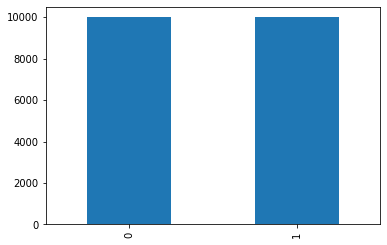

In [12]:
df['category'].value_counts().plot.bar()

D'apére ce graphe on a 50% des images sont des photos(9992) et 50% des images sont non-photos (9992)

## Création de l'architecture du réseau de neurones

Voici l'implémentation du modèle de réseau de neurones convolutionnels (ConvNet) en utilisant la bibliothèque Keras pour résoudre un problème de classification binaire. Le modèle est conçu pour prendre en entrée des images de taille 128x128 pixels avec 3 canaux de couleur (c'est-à-dire des images RVB).

 ### Configuration des paramètres :
   FAST_RUN est défini sur False, ce qui signifie que l'entraînement du modèle ne se fera pas rapidement, car il peut nécessiter beaucoup de temps.
        IMAGE_WIDTH et IMAGE_HEIGHT définissent la largeur et la hauteur des images d'entrée à 128x128 pixels.
        IMAGE_SIZE stocke la taille des images sous forme de tuple (128, 128).
        IMAGE_CHANNELS spécifie le nombre de canaux de couleur dans les images, qui est de 3 pour les images RVB.

   ### Création du modèle Sequential :
   Le modèle est séquentiel, ce qui signifie que les couches sont empilées les unes sur les autres dans l'ordre.

   ### Couches convolutionnelles :
   Trois couches Conv2D sont utilisées avec 32, 64 et 128 filtres respectivement, chacune suivie d'une fonction d'activation ReLU.
        Chaque couche Conv2D est suivie d'une couche de normalisation par lots (BatchNormalization) pour stabiliser l'apprentissage.
        Chaque couche Conv2D est également suivie d'une couche MaxPooling2D pour réduire la dimensionnalité de l'image.

   ### Couches de dropout :
   Après chaque couche MaxPooling2D, une couche de dropout est ajoutée pour réduire le surajustement (overfitting) du modèle.

   ### Couche de flattening :
   Après les couches convolutionnelles, il y a une couche de flattening (aplanissement) qui transforme les données en un vecteur unidimensionnel.

   ### Couches entièrement connectées (Fully Connected) :
   Deux couches Dense (entièrement connectées) sont ajoutées avec 512 neurones et une activation ReLU. La première couche est suivie d'une couche de normalisation par lots et d'une couche de dropout.

  ### Couche de sortie :
   La dernière couche Dense a 2 neurones, correspondant aux deux classes de classification, avec une activation softmax, ce qui signifie que le modèle effectue une classification binaire.

   ### Compilation du modèle :
   Le modèle est compilé avec la fonction de perte 'categorical_crossentropy' (bien que le problème soit binaire, ce choix peut être modifié en 'binary_crossentropy').
        L'optimiseur 'rmsprop' est utilisé.
        Les métriques de performance, telles que l'accuracy, sont suivies.

   ### Affichage du résumé du modèle :
   La méthode model.summary() est utilisée pour afficher une représentation textuelle du modèle, montrant les différentes couches, le nombre de paramètres et la forme de sortie de chaque couche.



In [1]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

c:\users\rostom\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
c:\users\rostom\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

   ### Visualisation du modèle :
   Le module visualkeras est utilisé pour générer une représentation visuelle du modèle en couches. Il propose différentes options pour afficher ou sauvegarder cette représentation.


  ### Définition des rappels (callbacks) :
  Deux rappels sont définis pour le modèle :
            EarlyStopping avec une patience de 10, ce qui signifie que l'entraînement s'arrêtera si aucune amélioration de la métrique de validation n'est observée pendant 10 époques consécutives.
            ReduceLROnPlateau qui réduit le taux d'apprentissage si la métrique de validation (val_acc) ne s'améliore pas pendant 2 époques consécutives. Il réduit le taux d'apprentissage de moitié (factor=0.5) et fixe un plancher minimal de 0.00001 (min_lr).

   ### Transformation des étiquettes de la catégorie :
   Il semble y avoir une transformation des étiquettes de catégorie, où les valeurs 0 sont remplacées par 'photo' et les valeurs 1 sont remplacées par 'not_photo'. Cela pourrait être utile pour la compréhension des classes lors de l'entraînement et de la prédiction.

In [ ]:
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [3]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
earlystop = EarlyStopping(patience=10)

In [5]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



In [6]:
callbacks = [earlystop, learning_rate_reduction]

In [13]:
df["category"] = df["category"].replace({0: 'photo', 1: 'not_photo'}) 

### Création de générateurs de données :
Des générateurs de données sont créés pour l'entraînement et la validation du modèle. Les données sont augmentées pour l'entraînement à l'aide de transformations telles que la rotation, la réduction d'échelle, la translation, etc. Les images sont également normalisées.

Les informations sur les statistiques des classes dans les ensembles de données d'entraînement et de validation sont affichées sous forme de graphiques.

Les variables total_train et total_validate stockent le nombre total d'échantillons dans les ensembles de données d'entraînement et de validation respectivement, et batch_size détermine la taille des lots utilisée pendant l'entraînement.

In [14]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

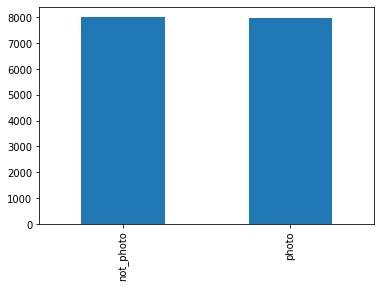

In [15]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

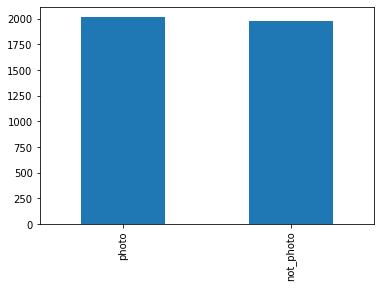

In [16]:


validate_df['category'].value_counts().plot.bar()



In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [19]:


train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)



Found 15988 validated image filenames belonging to 2 classes.


In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    path, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3997 validated image filenames belonging to 2 classes.


In [22]:


example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    path, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)



Found 1 validated image filenames belonging to 1 classes.


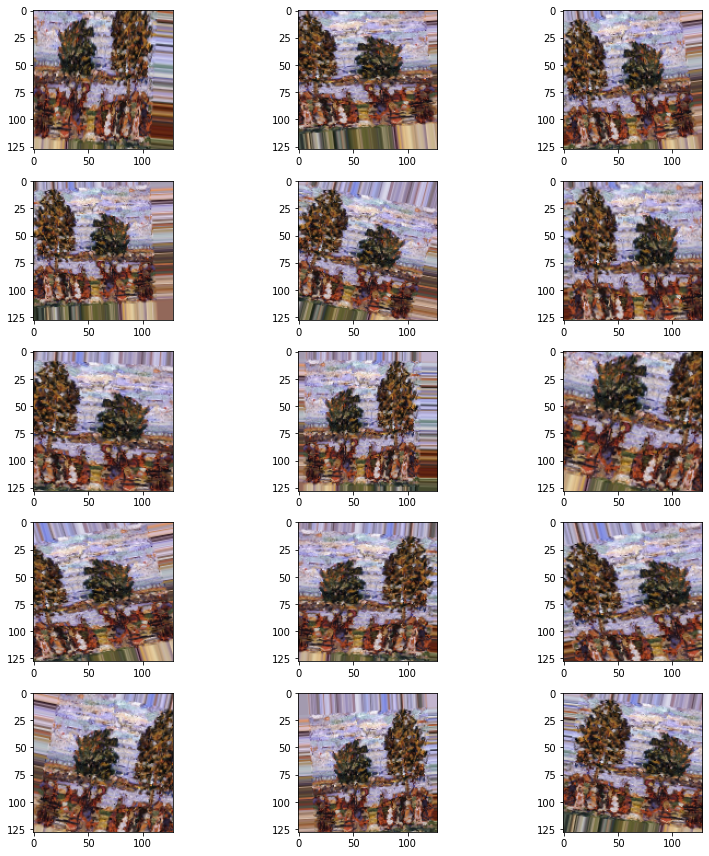

In [23]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [24]:


epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)



C:\Users\Rostom\AppData\Local\Temp\ipykernel_7712\3549458566.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
1065/1065 [==============================] - 434s 406ms/step - loss: 0.4807 - accuracy: 0.8035 - val_loss: 0.5304 - val_accuracy: 0.7589 - lr: 0.0010
Epoch 2/50
1065/1065 [==============================] - 376s 353ms/step - loss: 0.3699 - accuracy: 0.8389 - val_loss: 0.3301 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 3/50
1065/1065 [==============================] - 379s 355ms/step - loss: 0.3447 - accuracy: 0.8523 - val_loss: 0.4747 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 4/50
1065/1065 [==============================] - 373s 350ms/step - loss: 0.3332 - accuracy: 0.8594 - val_loss: 0.4653 - val_accuracy: 0.7702 - lr: 0.0010
Epoch 5/50
1065/1065 [==============================] - 377s 354ms/step - loss: 0.3165 - accuracy: 0.8673 - val_loss: 0.2473 - val_accuracy: 0.8997 - lr: 0.0010
Epoch 6/50
1065/1065 [==============================] - 395s 371ms/step - loss: 0.3052 - accuracy: 0.8734 - val_loss: 0.3450 - val_accuracy: 0.8574 - lr: 0.0010
Epoch 7/50
1065/1065 [============

In [25]:
model.save_weights("model.h5")

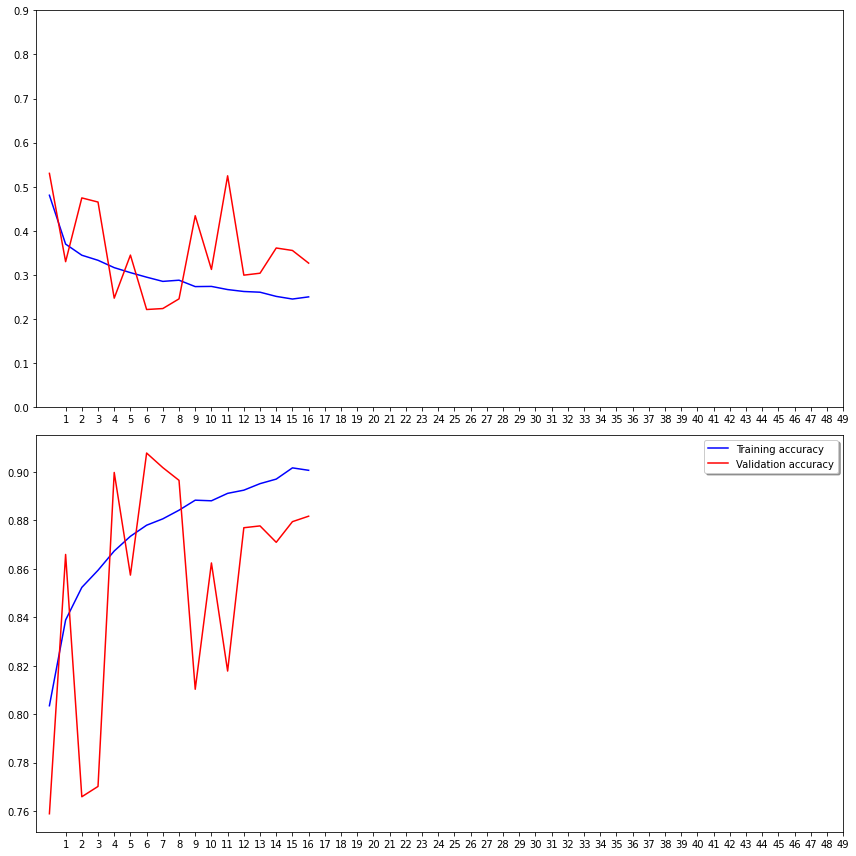

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.subplots as sp

# Create subplots
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Custom color palette
colors = ['#007acc', '#e85f5f']

# Plot training and validation accuracy
fig.add_trace(go.Scatter(x=np.arange(1, epochs), y=history.history['accuracy'], mode='lines', name="Training accuracy", line=dict(color=colors[0])))
fig.add_trace(go.Scatter(x=np.arange(1, epochs), y=history.history['val_accuracy'], mode='lines', name="Validation accuracy", line=dict(color=colors[1])), row=2, col=1)

# Layout
fig.update_layout(title="Training History", title_font=dict(size=16))
fig.update_xaxes(title_text="Epoch")
fig.update_yaxes(title_text="Accuracy", row=2, col=1)
fig.update_layout(showlegend=True, legend=dict(x=0, y=1.0))
fig.update_layout(xaxis=dict(tickvals=list(range(1, epochs)), tickmode="array"))

# Enable cursor interaction
fig.update_layout(hovermode="x")

# Show the Plotly figure
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# Custom color palette
colors = ['#007acc', '#e85f5f', '#2ca02c', '#ff7f0e']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], color=colors[0], label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color=colors[1], label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.grid(True)
ax2.legend(loc='best')

# Add title and annotations
plt.suptitle("Training History", fontsize=16)
ax1.annotate(f"Min Validation Loss: {min(history.history['val_loss']):.4f}", xy=(np.argmin(history.history['val_loss']), min(history.history['val_loss'])), xytext=(50, 50),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))
ax2.annotate(f"Max Validation Accuracy: {max(history.history['val_accuracy']):.4f}", xy=(np.argmax(history.history['val_accuracy']), max(history.history['val_accuracy'])), xytext=(50, -50),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

# Enable cursor interaction
mplcursors.cursor(hover=True)

# Add interactive legend
ax1_legend = ax1.legend(loc='best')
ax2_legend = ax2.legend(loc='best')

# Add zoom functionality
ax1.callbacks.connect('xlim_changed', ax2.set_xlim)
ax2.callbacks.connect('xlim_changed', ax1.set_xlim)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [50]:
test="C:/Users/Rostom/Desktop/dataset_projet/image_test"

test_filenames = os.listdir( "C:/Users/Rostom/Desktop/dataset_projet/image_test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [51]:
nb_samples

10

In [52]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 10 validated image filenames.


In [54]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\Users\Rostom\AppData\Local\Temp\ipykernel_7712\3090721588.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [55]:
test_df['category'] = np.argmax(predict, axis=-1)

In [56]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [57]:
test_df['category'] = test_df['category'].replace({0: 'photo', 1: 'not_photo'})

<AxesSubplot:>

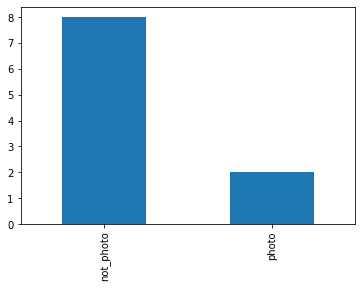

In [58]:
test_df['category'].value_counts().plot.bar()

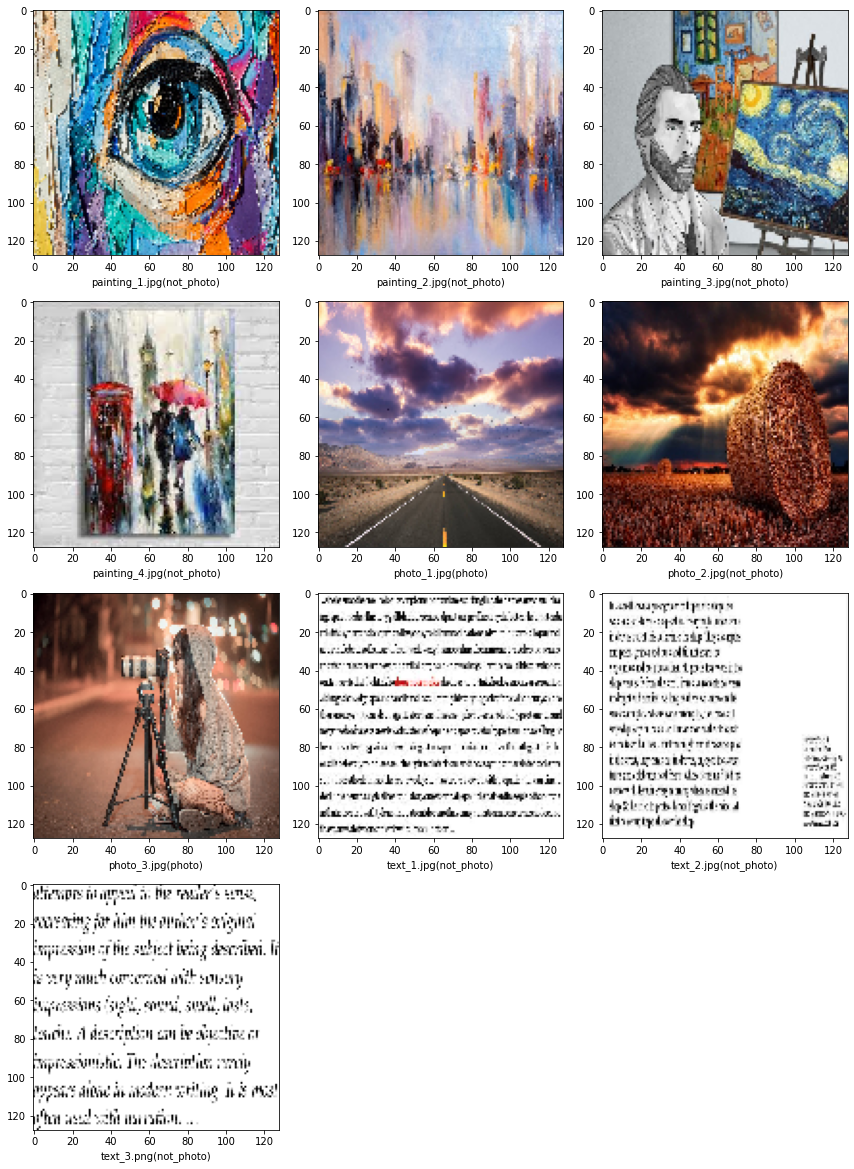

In [62]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test+"/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Cette partie du code est utilisée pour sauvegarder et charger l'historique de l'entraînement, sauvegarder et charger la structure du modèle au format JSON, et générer une représentation graphique de la structure du modèle. Cela peut être utile pour archiver des modèles, partager des informations sur l'entraînement, ou visualiser la structure du modèle.

In [ ]:
pip install netron

In [ ]:
#to save only 
import pickle

# Assuming history is the dictionary containing training history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history, file)

In [ ]:
import pickle

with open('training_history.pkl', 'rb') as file:
    history = pickle.load(file)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from JSON file
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create the model from the JSON string
loaded_model = model_from_json(loaded_model_json)

# You may also need to compile the model if you plan to use it for predictions
loaded_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(loaded_model, to_file="iris_model.png", show_shapes=True)